In [1]:
%matplotlib inline

from pyspark import SparkContext
from pyspark.sql import SQLContext

import download_data
import crash_deviations

In [2]:
sqlContext = SQLContext(sc)

174
[u'{972ce4c6-7e08-4474-a285-3208198ce6fd}', u'e10srollout@mozilla.org', u'loop@mozilla.org', u'firefox@getpocket.com', u'{4ED1F68A-5463-4931-9384-8FFF5ED91D92}', u'{d10d0bf8-f5b5-c8b4-a8b2-2b9879e08c5d}', u'webrootsecure@webroot.com', u'@greatdealzu', u'shopcbtoolbar2@befrugal.com', u'_39Members_@www.mapsgalaxy.com', u'langpack-fr@firefox.mozilla.org', u'{82AF8DCA-6DE9-405D-BD5E-43525BDAD38A}', u'{eb4b28c8-7f2d-4327-a00c-40de4299ba44}', u'ff_hpset@jetpack', u'{8ac62a8b-8b3f-43ba-9b1a-90c299b9dfda}', u'{e4a8a97b-f2ed-450b-b12d-ee082ba24781}', u'partnerdefaults@mozilla.com', u'{0b457cAA-602d-484a-8fe7-c1d894a011ba}']
root
 |-- _corrupt_record: string (nullable = true)
 |-- adapter_device_id: string (nullable = true)
 |-- adapter_driver_version: string (nullable = true)
 |-- adapter_vendor_id: string (nullable = true)
 |-- bios_manufacturer: string (nullable = true)
 |-- build_id: string (nullable = true)
 |-- cpu_info: string (nullable = true)
 |-- dom_ipc_enabled: string (nullable =

/usr/lib/python2.7/dist-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


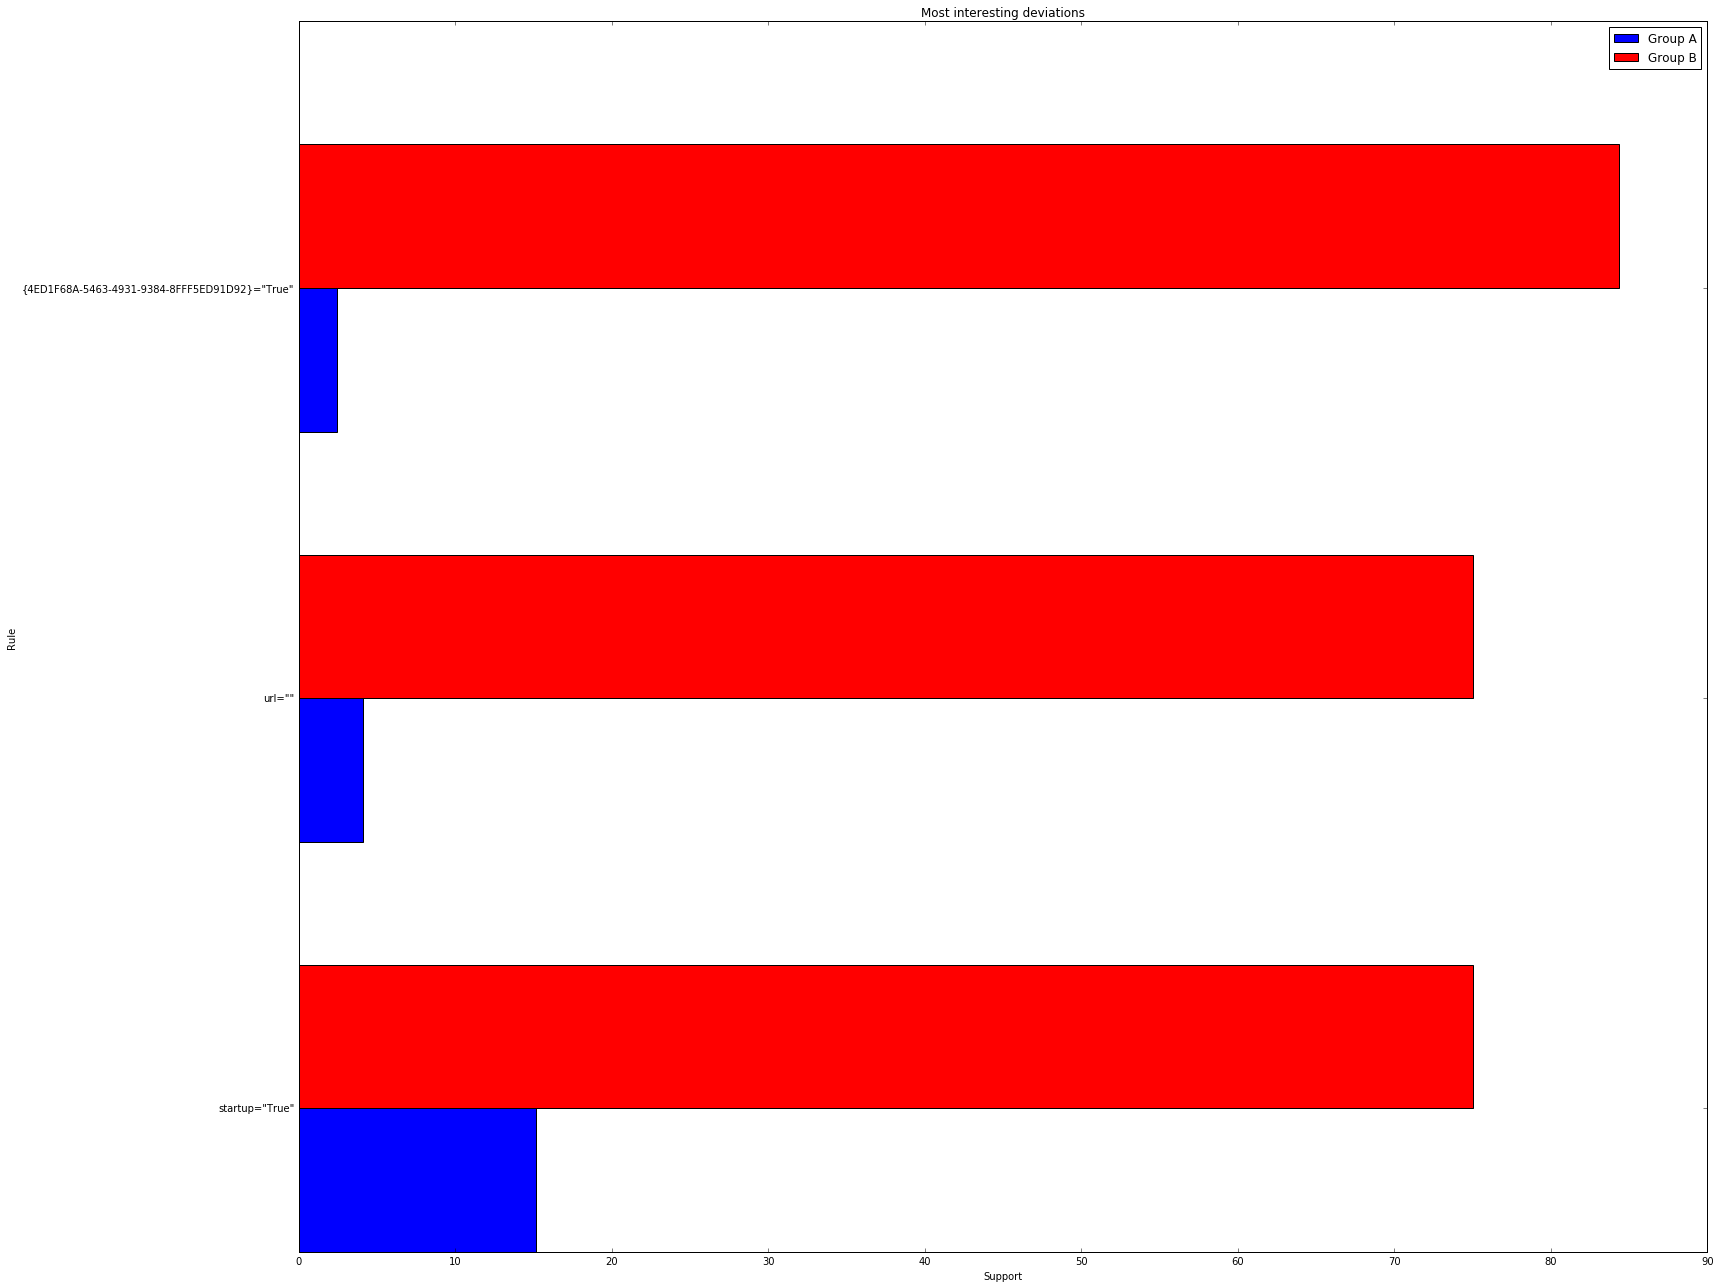

In [3]:
df_a = download_data.get_crashes(sqlContext, version='47.0', days=2)
df_b = df_a.filter(df_a['signature'].startswith('npmcffplg32.dll'))

crash_deviations.find_deviations(sc, df_a, df_b, min_support_diff=0.15, min_corr=0.03, max_addons=50)